In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

df = pd.read_csv("layoffs_data.csv")

print(df.head())
df.info()
print("Number of missing values per column")
print(df.isnull().sum())

print("Percentage of missing values per column")
print((df.isnull().mean() * 100).round(2))

df.describe(include='all')

       Company    Location_HQ   Industry  Laid_Off_Count        Date  \
0          Oda           Oslo       Food           150.0  2024-06-05   
1       Pagaya       Tel Aviv    Finance           100.0  2024-06-05   
2  Aleph Farms       Tel Aviv       Food            30.0  2024-06-05   
3      MoonPay          Dover     Crypto            30.0  2024-06-05   
4         Yext  New York City  Marketing             NaN  2024-06-05   

                                              Source  Funds_Raised     Stage  \
0  https://techcrunch.com/2024/06/05/softbank-bac...         691.0   Unknown   
1  https://www.calcalistech.com/ctechnews/article...        2000.0  Post-IPO   
2  https://www.calcalistech.com/ctechnews/article...         119.0   Unknown   
3  https://www.theblock.co/post/298638/moonpay-la...         651.0   Unknown   
4  https://www.investing.com/news/economy-news/ye...         117.0  Post-IPO   

            Date_Added        Country  Percentage List_of_Employees_Laid_Off  
0  2024

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
count,3642,3642,3642,2389.000000,3642,3642,3252.000000,3642,3642,3642,2342.000000,3642
unique,2596,240,31,NaN,825,3407,NaN,16,3603,63,NaN,48
top,Google,SF Bay Area,Finance,NaN,2020-04-02,Internal memo,NaN,Post-IPO,2020-03-28 20:52:49,United States,NaN,Unknown
freq,12,905,451,NaN,27,98,NaN,768,40,2369,NaN,3595
mean,NaN,NaN,NaN,257.926329,NaN,NaN,798.569494,NaN,NaN,NaN,0.281216,NaN
std,NaN,NaN,NaN,829.432277,NaN,NaN,4758.393161,NaN,NaN,NaN,0.287294,NaN
min,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,40.000000,NaN,NaN,51.000000,NaN,NaN,NaN,0.100000,NaN
50%,NaN,NaN,NaN,80.000000,NaN,NaN,166.000000,NaN,NaN,NaN,0.170000,NaN
75%,NaN,NaN,NaN,181.000000,NaN,NaN,469.250000,NaN,NaN,NaN,0.300000,NaN


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("layoffs_data.csv")

numeric_cols = ['Laid_Off_Count', 'Percentage']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

categorical_cols = ['Company', 'Location_HQ', 'Industry', 'Country']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

df = df[['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Country', 'Percentage', 'YearMonth']]

categorical_to_encode = ['Company', 'Location_HQ', 'Industry', 'Country']
df_encoded = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True)

scaler = MinMaxScaler()
scaled_features = ['Laid_Off_Count', 'Percentage']
df_encoded[scaled_features] = scaler.fit_transform(df_encoded[scaled_features])

print("One-Hot encoding + Min-Max scaling applied successfully!")

df_agg = df_encoded.groupby('YearMonth').mean().reset_index()

output_file = "layoffs_fcm_preprocessed.csv"
df_agg.to_csv(output_file, index=False)

print(f"Saved to: {output_file}")
print(f"Shape of processed dataset: {df_agg.shape}")


✅ One-Hot encoding + Min-Max scaling applied successfully!
✅ Fuzzy C-Means preprocessed dataset saved to: layoffs_fcm_preprocessed.csv
Shape of processed dataset: (52, 2929)


In [5]:
print(df.head())
df.info()
print("Number of missing values per column")
print(df.isnull().sum())
df.describe()



       Company    Location_HQ   Industry  Laid_Off_Count        Country  \
0          Oda           Oslo       Food           150.0         Norway   
1       Pagaya       Tel Aviv    Finance           100.0         Israel   
2  Aleph Farms       Tel Aviv       Food            30.0         Israel   
3      MoonPay          Dover     Crypto            30.0  United States   
4         Yext  New York City  Marketing            80.0  United States   

   Percentage YearMonth  
0        0.17   2024-06  
1        0.20   2024-06  
2        0.30   2024-06  
3        0.10   2024-06  
4        0.12   2024-06  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         3642 non-null   object 
 1   Location_HQ     3642 non-null   object 
 2   Industry        3642 non-null   object 
 3   Laid_Off_Count  3642 non-null   float64
 4   Country     

,Laid_Off_Count,Percentage
count,3642.000000,3642.000000
mean,196.712246,0.241518
std,677.017770,0.236449
min,3.000000,0.000000
25%,60.000000,0.140000
50%,80.000000,0.170000
75%,110.000000,0.210000
max,14000.000000,1.000000


✅ Using 2 numeric columns for clustering.
Clusters: 3, Fuzziness (m): 2, FPC: 0.9773
Clusters: 4, Fuzziness (m): 2, FPC: 0.9604
Clusters: 5, Fuzziness (m): 2, FPC: 0.9378
Clusters: 6, Fuzziness (m): 2, FPC: 0.9229
Clusters: 7, Fuzziness (m): 2, FPC: 0.9214
Clusters: 3, Fuzziness (m): 1.9, FPC: 0.9814
Clusters: 4, Fuzziness (m): 1.9, FPC: 0.9670
Clusters: 5, Fuzziness (m): 1.9, FPC: 0.9506
Clusters: 6, Fuzziness (m): 1.9, FPC: 0.9348
Clusters: 7, Fuzziness (m): 1.9, FPC: 0.9338
Clusters: 3, Fuzziness (m): 1.8, FPC: 0.9848
Clusters: 4, Fuzziness (m): 1.8, FPC: 0.9727
Clusters: 5, Fuzziness (m): 1.8, FPC: 0.9610
Clusters: 6, Fuzziness (m): 1.8, FPC: 0.9455
Clusters: 7, Fuzziness (m): 1.8, FPC: 0.9448
Clusters: 3, Fuzziness (m): 1.7, FPC: 0.9878
Clusters: 4, Fuzziness (m): 1.7, FPC: 0.9778
Clusters: 5, Fuzziness (m): 1.7, FPC: 0.9690
Clusters: 6, Fuzziness (m): 1.7, FPC: 0.9549
Clusters: 7, Fuzziness (m): 1.7, FPC: 0.9546
Clusters: 3, Fuzziness (m): 1.6, FPC: 0.9903
Clusters: 4, Fuzziness 

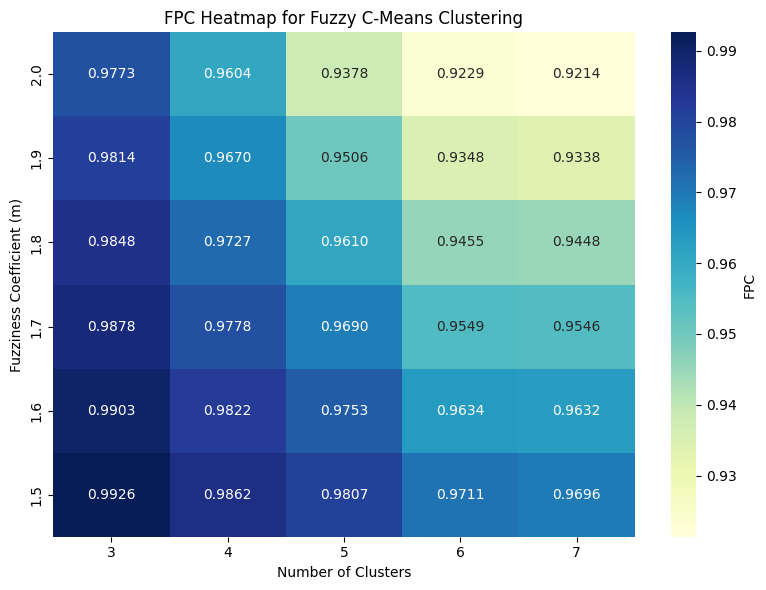

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz

df = df.dropna(subset=['YearMonth'])
df['YearMonth'] = df['YearMonth'].astype(str)

numeric_df = df.select_dtypes(include=[np.number])
print(f" Using {numeric_df.shape[1]} numeric columns for clustering.")

X = numeric_df.values
X_T = X.T  

m_values = [2, 1.9, 1.8, 1.7, 1.6, 1.5]
cluster_counts = [3, 4, 5, 6, 7]

results = []

for m in m_values:
    for c in cluster_counts:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X_T, c=c, m=m, error=0.005, maxiter=1000
        )
        print(f"Clusters: {c}, Fuzziness (m): {m}, FPC: {fpc:.4f}")
        results.append({'Clusters': c, 'Fuzziness': m, 'FPC': fpc})

results_df = pd.DataFrame(results)

heatmap_data = results_df.pivot(index='Fuzziness', columns='Clusters', values='FPC')
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='YlGnBu', cbar_kws={'label': 'FPC'})
plt.title('FPC Heatmap for Fuzzy C-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzziness Coefficient (m)')
plt.gca().invert_yaxis()  # optional: show largest m on top
plt.tight_layout()
plt.show()




In [3]:
best_row = results_df.loc[results_df['FPC'].idxmax()]
best_clusters = int(best_row['Clusters'])
best_m = best_row['Fuzziness']

print(f"\n Best FCM configuration: {best_clusters} clusters, m = {best_m}, FPC = {best_row['FPC']:.4f}")

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_T, c=best_clusters, m=best_m, error=0.005, maxiter=1000
)
cluster_labels = np.argmax(u, axis=0)
df['FCM_Cluster'] = cluster_labels



✅ Best FCM configuration: 3 clusters, m = 1.5, FPC = 0.9926


In [4]:
top_n = 5 

for i in range(best_clusters):
    cluster_membership = u[i, :]
    df[f'Cluster_{i}_Membership'] = cluster_membership  

    top_entries = df.copy()
    top_entries = top_entries.sort_values(by=f'Cluster_{i}_Membership', ascending=False).head(top_n)

    pd.set_option('display.max_columns', None)
    print(top_entries)

numeric_cols = df.select_dtypes(include=[np.number]).columns 
cluster_averages = df.groupby('FCM_Cluster')[numeric_cols].mean()

print("\n Average values for all numeric columns per cluster:")
print(cluster_averages)



🏆 Top 5 entries for Cluster 0:
        Company  Location_HQ  Industry  Laid_Off_Count        Country  \
1201     Amazon      Seattle    Retail          9000.0  United States   
1576  Microsoft      Seattle     Other         10000.0  United States   
1218       Meta  SF Bay Area  Consumer         10000.0  United States   
1959     Amazon      Seattle    Retail         10000.0  United States   
1288   Ericsson    Stockholm     Other          8500.0         Sweden   

      Percentage YearMonth  FCM_Cluster  Cluster_0_Membership  
1201        0.17   2023-03            0              0.999998  
1576        0.05   2023-01            0              0.999867  
1218        0.17   2023-03            0              0.999867  
1959        0.03   2022-11            0              0.999867  
1288        0.08   2023-02            0              0.999758  

🏆 Top 5 entries for Cluster 1:
           Company     Location_HQ     Industry  Laid_Off_Count  \
1172     Blue Nile         Seattle       Retai

In [9]:
top_n = 5 
for i in range(best_clusters):
    cluster_membership = u[i, :]
    df[f'Cluster_{i}_Membership'] = cluster_membership 

    top_entries = df.copy()
    top_entries = top_entries.sort_values(by=f'Cluster_{i}_Membership', ascending=False).head(top_n)
    
    print(f"\n Cluster {i}:")
    pd.set_option('display.max_columns', None)
    print(top_entries)

numeric_cols = df.select_dtypes(include=[np.number]).columns 
cluster_averages = df.groupby('FCM_Cluster')[numeric_cols].mean()

print("\n Average values for all numeric columns per cluster:")
print(cluster_averages)



 Cluster 0:
        Company  Location_HQ  Industry  Laid_Off_Count        Country  \
1201     Amazon      Seattle    Retail          9000.0  United States   
1576  Microsoft      Seattle     Other         10000.0  United States   
1218       Meta  SF Bay Area  Consumer         10000.0  United States   
1959     Amazon      Seattle    Retail         10000.0  United States   
1288   Ericsson    Stockholm     Other          8500.0         Sweden   

      Percentage YearMonth  FCM_Cluster  Cluster_0_Membership  \
1201        0.17   2023-03            0              0.999998   
1576        0.05   2023-01            0              0.999867   
1218        0.17   2023-03            0              0.999867   
1959        0.03   2022-11            0              0.999867   
1288        0.08   2023-02            0              0.999758   

      Cluster_1_Membership  Cluster_2_Membership  
1201          4.505009e-07              0.000001  
1576          3.685947e-05              0.000096  
1218

In [6]:
temporal_clusters = (
    df.groupby(['YearMonth', 'FCM_Cluster'])['Laid_Off_Count']
      .sum()
      .unstack(fill_value=0)
)
temporal_clusters_norm = temporal_clusters.div(temporal_clusters.sum(axis=1), axis=0)


C:\Users\40723\AppData\Local\Temp\ipykernel_288\3348569505.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\40723\anaconda3\envs\AMDAResearchReport1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


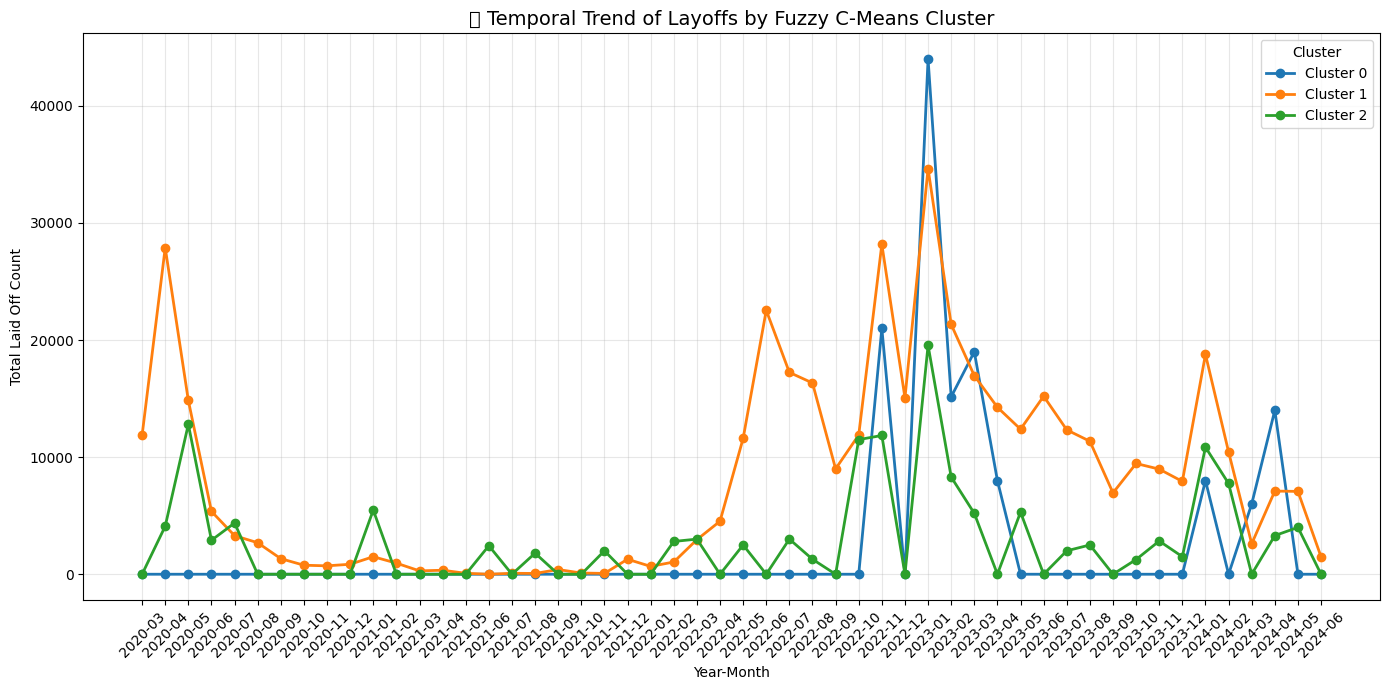

In [7]:
plt.figure(figsize=(14,7))
for cluster in temporal_clusters.columns:
    plt.plot(temporal_clusters.index, temporal_clusters[cluster],
             marker='o', linewidth=2, label=f'Cluster {cluster}')

plt.title('Temporal Trend of Layoffs by Fuzzy C-Means Cluster', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Total Laid Off Count')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

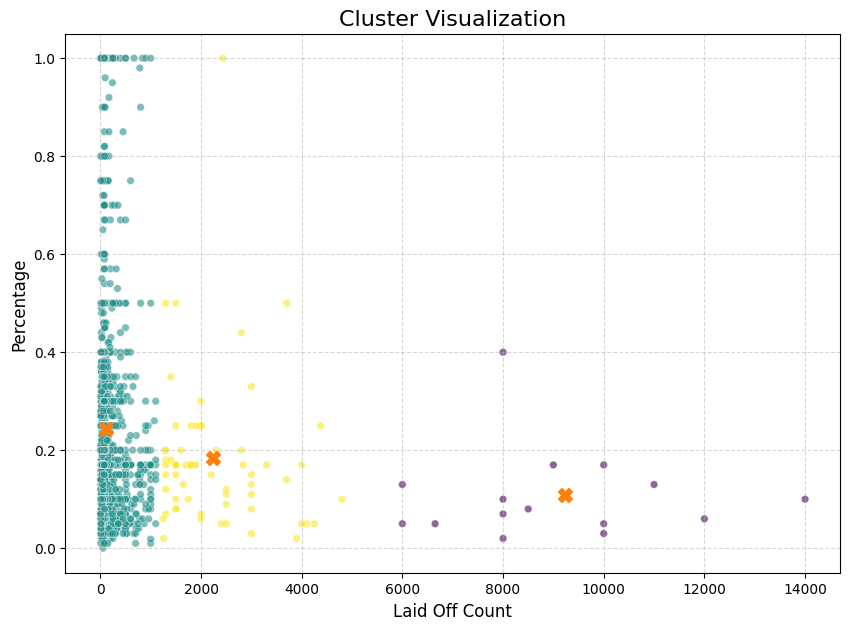

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

if 'df' not in locals() or 'FCM_Cluster' not in df.columns:
    print("'df' with 'FCM_Cluster' not found.")
    print("Please ensure the previous clustering cell has been run successfully.")
    best_clusters = 3 # Dummy value
    df = pd.DataFrame({
        'Laid_Off_Count': np.random.rand(100) * 1000,
        'Percentage': np.random.rand(100),
        'FCM_Cluster': np.random.randint(0, best_clusters, 100)
    })


if 'cntr' not in locals():
    print("'cntr' (cluster centers) not found. Creating dummy centers.")
    dummy_centers = np.array([
        [100, 0.1], [800, 0.8], [500, 0.5]
    ])
    cntr = dummy_centers
elif 'best_clusters' not in locals():
    best_clusters = cntr.shape[0]

print("")

plt.figure(figsize=(10, 7))

ax = sns.scatterplot(
    data=df,
    x='Laid_Off_Count',
    y='Percentage',
    hue='FCM_Cluster',
    palette='viridis',
    alpha=0.6,
    s=30,
    legend=False
)

if cntr.shape == (best_clusters, 2):
    centers_df = pd.DataFrame(cntr, columns=['Laid_Off_Count', 'Percentage'])
    
    ax.scatter(
        centers_df['Laid_Off_Count'],
        centers_df['Percentage'],
        s=100,
        marker='X',

    )
else:
    print(f" 'cntr' shape is {cntr.shape}, expected {(best_clusters, 2)}. Skipping centers.")

ax.set_title(f'Cluster Visualization', fontsize=16)
ax.set_xlabel('Laid Off Count', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
